---

<div class="alert alert-block alert-warning">
    

### Комментарий
Привет! Спасибо за уделенные проекту силы и время! Мои комментарии дальше будут выглядеть вот так.

</div>

---

_Наша задача - проанализировать пользователей, которые зарегистрировались в 2018 году, то есть_ __в промежутке между 1 января и 31 декабря 2018 года включительно.__

---

<div class="alert alert-block alert-warning">
    

### Комментарий
Отличная практика - в начале исследования указывать гипотезы, которые проверяем, а также описывать события, которые рассматриваем. Замечательно, что предобработка данных выделена в отдельный блок!

</div>

---

Перед нами стоит __3__ гипотезы, которые нам нужно проверить:
> #### <span style="color:red">__1.__</span> Отличается ли время прохождения различных этапов для пользователей, которые прошли обучение, от пользователей, не начинавших обучение? Насколько обучение сокращает время прохождения этапов? [Перейти к расчетам](#1)

> #### <span style="color:red">__2.__</span> Существует ли зависимость между вероятностью оплаты тренировки и количеством обучений, которые начинал или завершал пользователь. Нужно доказать, что успешное обучение влияет на оплату само по себе, без разницы, какое оно было по порядку. [Перейти к расчетам](#2)

> #### <span style="color:red">__3.__</span>Как часто пользователи начинают обучение после того, как они выбрали уровень сложности тренировок? Это позволит нам понять, насколько процесс работы с приложением понятен для пользователей: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна. [Перейти к расчетам](#3)

Сначала импортируем нужные библиотеки:
 - __pandas__ предоставляет удобные инструменты для хранения данных и работе с ними
 - __psycopg2__ позволяет делать запросы к БД PostgreSQL из Python
 - __numpy__ добавляет поддержку многомерных масивов и математических функций для операций с ними
 - __matplotlib__ графическая библиотека, которая поможет нам в построении графиков по результатам анализа


In [1]:
import pandas as pd
import psycopg2
import psycopg2.extras 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
# pd.set_option('display.max_rows', None) --optional (just help to see all rows, when it's necessary)

Функция __getEventsData()__ получает данные по событиям пользователей, которые зарегистрировались в __2018__ году.

In [2]:
def getEventsData():
    query = '''SELECT e.* FROM case8.events e
    WHERE e.user_id in
    (SELECT DISTINCT(user_id) 
    FROM case8.events 
    WHERE event_type = 'registration' 
    AND start_time >= '2018-01-01'
    AND start_time < '2019-01-01')
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='skillfactory' host='84.201.134.129' password='cCkxxLVrDE8EbvjueeMedPKt' port=5432")
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data

Функция __getPurchaseData()__ получает данные по оплатам пользователей, которые зарегистрировались в __2018__ году.

In [3]:
def getPurchaseData():
    query = '''SELECT p.* FROM case8.purchase p
    WHERE p.user_id in
    (SELECT DISTINCT(user_id) 
    FROM case8.events 
    WHERE event_type = 'registration' 
    AND start_time >= '2018-01-01'
    AND start_time < '2019-01-01')
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='skillfactory' host='84.201.134.129' password='cCkxxLVrDE8EbvjueeMedPKt' port=5432")
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data

Результат запишем в датафреймы __events_df__ и __purchase_df__

In [4]:
events_df = pd.DataFrame(getEventsData())
purchase_df = pd.DataFrame(getPurchaseData())

Вызовем метод __describe()__ для того, чтобы оценить характеристики каждого столбца. По умолчанию метод __describe()__ выдает характеристики только по столбцам с численными типами(например, _int64, float64_ ). Мы вызовем этот метод с параметром __include='all'__ для того, чтобы отображать характеристики для всех столбцов.

In [5]:
events_df.describe(include='all')

,event_type,selected_level,start_time,tutorial_id,user_id,id
count,82779,10198,82779,41201.000000,82779.000000,82779.000000
unique,5,3,82622,NaN,NaN,NaN
top,registration,medium,2018-03-01 09:53:30,NaN,NaN,NaN
freq,24460,5776,4,NaN,NaN,NaN
first,NaN,NaN,2018-01-01 04:51:58,NaN,NaN,NaN
last,NaN,NaN,2019-01-01 09:03:24,NaN,NaN,NaN
mean,NaN,NaN,NaN,60853.276207,59932.814446,188656.000568
std,NaN,NaN,NaN,6525.340246,7074.775488,23896.384413
min,NaN,NaN,NaN,49555.000000,47758.000000,147264.000000
25%,NaN,NaN,NaN,55199.000000,53769.500000,167961.500000


___
Выведем первые 5 строчек таблицы events, чтобы понять что она представляет из себя.

In [6]:
events_df.head()

,event_type,selected_level,start_time,tutorial_id,user_id,id
0,registration,None,2018-01-01 04:51:58,NaN,47758,147264
1,registration,None,2018-01-01 08:32:05,NaN,47759,147268
2,registration,None,2018-01-01 09:30:10,NaN,47760,147269
3,registration,None,2018-01-01 09:39:27,NaN,47761,147270
4,registration,None,2018-01-01 11:41:27,NaN,47762,147271


Таблица __event__ хранит данные о событиях, которые совершают пользователи:

 - Столбец __id__ — идентификатор события   
 - Столбец __user_id__ — уникальный идентификатор пользователя приложения, который совершил событие   
 - Столбец __start_time__ — дата и время события   
 - Столбец __event_type__ — тип события   
 - Столбец __tutorial_id__ — идентификатор обучения (этот идентификатор есть только у событий   
 - Столбец __selected_level__ — выбранный уровень сложности обучения   

Прежде чем приступить к анализу __первой гипотезы__, стоит понять _какие этапы_ при работе с приложением существуют.

In [7]:
events_df['event_type'].unique()

array(['registration', 'tutorial_start', 'tutorial_finish',
       'level_choice', 'training_choice'], dtype=object)

#### Более подробнее о том, что представляет из себя каждый этап:

 - __Регистрация (registration)__ — это обязательный этап. Без регистрации пользователь не может пройти на следующие этапы работы с приложением.

 - __Старт обучения (tutorial_start)__ — опциональный этап. Пользователь после регистрации может перейти к обучению работе с приложением, а может и не перейти. При этом вернуться к обучению можно в любой момент времени, а также можно пройти обучение несколько раз.

 - __Завершение обучения (tutorial_finish)__ может произойти только в случае, если ранее произошло событие Старт обучения, но при этом пользователь может не завершить обучение.

 - __Выбор уровня сложности тренировок (level_choice)__ — это обязательное событие, которое нужно для того, чтобы перейти к выбору тренировок. Таким образом, пользователь может не пройти обучение или даже не начинать его, но прежде чем начать тренировку он обязан выбрать уровень сложности.

 - __Выбор тренировок (training_choice)__ — это этап, на котором пользователь выбирает себе бесплатный набор тренировок, в соответствии с которыми он будет тренироваться.

___
Теперь посмотрим первые 5 строчек таблицы __purchase__, чтобы понять что она представляет из себя

In [8]:
purchase_df.head()

,user_id,start_time,amount,id
0,67986,2018-11-17 13:18:35,50,20103
1,58528,2018-06-23 23:24:43,100,19351
2,61351,2018-08-08 09:40:36,100,19565
3,48037,2018-01-10 13:08:34,50,18470
4,67987,2018-11-13 22:51:38,100,20087


Таблица __purchase__ хранит данные об оплатах, которые совершают пользователи:

 - Столбец __id__ — идентификатор оплаты   
 - Столбец __user_id__ — уникальный идентификатор пользователя приложения, который совершил оплату   
 - Столбец __start_time__ — дата и время оплаты   
 - Столбец __amount__ — сумма оплаты   

<hr>
Для начала давайте объединим датафрейм с событиями вместе с датафреймом по оплатам. Это позволит анализировать все эти события в рамках одной структуры данных.

Сначала добавим в датафрейм __purchase_df__ столбец __event_type__, который будет содержать одно значение __purchase__. Это нужно, чтобы в объединенном датафрейме однозначно выделить события оплаты.

In [9]:
purchase_df['event_type'] = 'purchase'
purchase_df.head()

,user_id,start_time,amount,id,event_type
0,67986,2018-11-17 13:18:35,50,20103,purchase
1,58528,2018-06-23 23:24:43,100,19351,purchase
2,61351,2018-08-08 09:40:36,100,19565,purchase
3,48037,2018-01-10 13:08:34,50,18470,purchase
4,67987,2018-11-13 22:51:38,100,20087,purchase


Также у нас есть одинаковые столбцы __id__ в двух датафреймах, но смысл их несколько отличается, так как столбец __id__ в __events_df__ указывает на идентификатор события, а столбец __id__ в __purchase_df__ указывает на идентификатор оплаты. Поэтому применим функцию __rename()__.

In [10]:
events_df = events_df.rename(columns={'id':'event_id'})
purchase_df = purchase_df.rename(columns={'id':'purchase_id'})

In [11]:
events_df.head()

,event_type,selected_level,start_time,tutorial_id,user_id,event_id
0,registration,None,2018-01-01 04:51:58,NaN,47758,147264
1,registration,None,2018-01-01 08:32:05,NaN,47759,147268
2,registration,None,2018-01-01 09:30:10,NaN,47760,147269
3,registration,None,2018-01-01 09:39:27,NaN,47761,147270
4,registration,None,2018-01-01 11:41:27,NaN,47762,147271


In [12]:
purchase_df.head()

,user_id,start_time,amount,purchase_id,event_type
0,67986,2018-11-17 13:18:35,50,20103,purchase
1,58528,2018-06-23 23:24:43,100,19351,purchase
2,61351,2018-08-08 09:40:36,100,19565,purchase
3,48037,2018-01-10 13:08:34,50,18470,purchase
4,67987,2018-11-13 22:51:38,100,20087,purchase


Следующим шагом объединим датафреймы __events_df__ и __purchase_df__ с помощью функции __pd.concat()__ и запишем объединенный датафрейм в переменную __total_events_df__.

In [13]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82779 entries, 0 to 82778
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_type      82779 non-null  object        
 1   selected_level  10198 non-null  object        
 2   start_time      82779 non-null  datetime64[ns]
 3   tutorial_id     41201 non-null  float64       
 4   user_id         82779 non-null  int64         
 5   event_id        82779 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 3.8+ MB


In [14]:
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      1974 non-null   int64         
 1   start_time   1974 non-null   datetime64[ns]
 2   amount       1974 non-null   int64         
 3   purchase_id  1974 non-null   int64         
 4   event_type   1974 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 77.2+ KB


In [15]:
total_events_df = pd.concat([events_df,purchase_df],sort=False)

In [16]:
total_events_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84753 entries, 0 to 1973
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_type      84753 non-null  object        
 1   selected_level  10198 non-null  object        
 2   start_time      84753 non-null  datetime64[ns]
 3   tutorial_id     41201 non-null  float64       
 4   user_id         84753 non-null  int64         
 5   event_id        82779 non-null  float64       
 6   amount          1974 non-null   float64       
 7   purchase_id     1974 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 5.8+ MB


Теперь сбросим индексы объединенного датафрейма (так как после объединения они дублировались и несут мало смысла) с помощью метода __reset_index()__.

In [17]:
total_events_df = total_events_df.reset_index(drop=True).sort_values('start_time')
total_events_df

,event_type,selected_level,start_time,tutorial_id,user_id,event_id,amount,purchase_id
0,registration,None,2018-01-01 04:51:58,NaN,47758,147264.0,NaN,NaN
1,registration,None,2018-01-01 08:32:05,NaN,47759,147268.0,NaN,NaN
2,registration,None,2018-01-01 09:30:10,NaN,47760,147269.0,NaN,NaN
3,registration,None,2018-01-01 09:39:27,NaN,47761,147270.0,NaN,NaN
4,registration,None,2018-01-01 11:41:27,NaN,47762,147271.0,NaN,NaN
...,...,...,...,...,...,...,...,...
84697,purchase,NaN,2019-01-06 07:08:00,NaN,72172,NaN,50.0,20418.0
83166,purchase,NaN,2019-01-06 07:36:11,NaN,72212,NaN,50.0,20419.0
83608,purchase,NaN,2019-01-06 10:53:03,NaN,72197,NaN,200.0,20421.0
84558,purchase,NaN,2019-01-06 23:26:44,NaN,72169,NaN,50.0,20424.0


<a id="1"></a>
Давайте для начала выделим датафреймы, в которых будут хранится отдельные этапы пользования с приложением. Напомним, какие этапы у нас существуют:<br><br>
>__Регистрация (registration)__<br>
>__Старт обучения (tutorial_start)__<br>
>__Завершение обучения (tutorial_finish)__<br>
>__Выбор уровня сложности тренировок (level_choice)__<br>
>__Выбор тренировок (training_choice)__<br>
>__Покупка платных тренировок (purchase)__<br>

Оставим только те данные, которые нужны для наших вычислений - столбец __user_id__ с идентификатором пользователя и столбец __start_time__ со временем cобытия.   

Поскольку столбец __start_time__ означает дата и время того или иного события, сразу переименуем данный столбец для каждого датафрейма, чтобы лучше понимать, о каком времени идет речь.   

Также отобразим количество пользователей, выполнившие каждый этиап.   

1. __Регистрация (registration)__

In [18]:
registration_df = total_events_df[total_events_df['event_type'] == 'registration']
registration_df = registration_df[['user_id','start_time']].rename(columns={'start_time':'registration_time'})
registration_df.head()

,user_id,registration_time
0,47758,2018-01-01 04:51:58
1,47759,2018-01-01 08:32:05
2,47760,2018-01-01 09:30:10
3,47761,2018-01-01 09:39:27
4,47762,2018-01-01 11:41:27


In [19]:
print('Количество пользователей, выполнившие этап регистрации:', len(registration_df['user_id']))

Количество пользователей, выполнившие этап регистрации: 24460


2. __Старт обучения (tutorial_start)__

In [20]:
tutorial_start_df = total_events_df[total_events_df['event_type'] == 'tutorial_start']
tutorial_start_df = tutorial_start_df[['user_id','start_time']].rename(columns={'start_time':'tutorial_start_time'})
tutorial_start_df.head()

,user_id,tutorial_start_time
6,47758,2018-01-01 13:55:11
7,47761,2018-01-01 13:56:40
11,47760,2018-01-01 14:45:21
20,47768,2018-01-01 17:19:18
23,47759,2018-01-01 17:59:28


In [21]:
print('Количество пользователей, начавшие этап обучения:', len(tutorial_start_df['user_id']))

Количество пользователей, начавшие этап обучения: 22597


3. __Завершение обучения (tutorial_finish)__

In [22]:
tutorial_finish_df = total_events_df[total_events_df['event_type'] == 'tutorial_finish']
tutorial_finish_df = tutorial_finish_df[['user_id','start_time']].rename(columns={'start_time':'tutorial_finish_time'})
tutorial_finish_df.head()

,user_id,tutorial_finish_time
8,47761,2018-01-01 13:59:44
12,47760,2018-01-01 14:51:15
21,47768,2018-01-01 17:25:21
24,47759,2018-01-01 18:06:20
37,47768,2018-01-01 20:07:37


In [23]:
print('Количество пользователей, завершившие этап обучения:', len(tutorial_finish_df['user_id']))

Количество пользователей, завершившие этап обучения: 18604


4. __Выбор уровня сложности тренировок (level_choice)__

In [24]:
level_choice_df = total_events_df[total_events_df['event_type'] == 'level_choice']
level_choice_df = level_choice_df[['user_id','start_time']].rename(columns={'start_time':'level_choice_time'})
level_choice_df.head()

,user_id,level_choice_time
13,47761,2018-01-01 15:05:04
18,47760,2018-01-01 16:54:36
26,47768,2018-01-01 18:44:32
35,47759,2018-01-01 20:05:14
48,47766,2018-01-02 00:07:39


In [25]:
print('Количество пользователей, выбравшие уровень сложности тренировок:', len(level_choice_df['user_id']))

Количество пользователей, выбравшие уровень сложности тренировок: 10198


4. __Выбор тренировок (training_choice)__

In [26]:
training_choice_df = total_events_df[total_events_df['event_type'] == 'training_choice']
training_choice_df = training_choice_df[['user_id','start_time']].rename(columns={'start_time':'training_choice_time'})
training_choice_df.head()

,user_id,training_choice_time
14,47761,2018-01-01 15:12:25
27,47768,2018-01-01 18:46:24
36,47759,2018-01-01 20:06:57
50,47766,2018-01-02 00:15:02
59,47779,2018-01-02 04:51:24


In [27]:
print('Количество пользователей, выбравшие тренировку:', len(training_choice_df['user_id']))

Количество пользователей, выбравшие тренировку: 6920


5. __Покупка платных тренировок (purchase)__<br>

In [28]:
purchase_stage_df = purchase_df[['user_id','start_time']].rename(columns={'start_time':'purchase_time'})
purchase_stage_df.head()

,user_id,purchase_time
0,67986,2018-11-17 13:18:35
1,58528,2018-06-23 23:24:43
2,61351,2018-08-08 09:40:36
3,48037,2018-01-10 13:08:34
4,67987,2018-11-13 22:51:38


In [29]:
purchase_users = purchase_stage_df['user_id']
print('Количество пользователей, купившие платные тренировки:', len(purchase_users))

Количество пользователей, купившие платные тренировки: 1974


Проверим, что в наших датафреймах для каждого пользователя содержится _только по одному событию_, чтобы в последствии удалить дубликаты. Если не удалять дубликаты, то будет сложнее оценить время между этапами поскольку некие этапы будут повторяться тем или иным пользователем, что исказит сравнение времени прохождения разных этапов.

In [30]:
registration_df['user_id'].value_counts().mean()

1.0

In [31]:
tutorial_start_df['user_id'].value_counts().mean()

1.5529516871692668

In [32]:
tutorial_finish_df['user_id'].value_counts().mean()

1.484638097518155

In [33]:
level_choice_df['user_id'].value_counts().mean()

1.0

In [34]:
training_choice_df['user_id'].value_counts().mean()

1.0

Как мы видим в датафреймах __tutorial_start_df__ и __tutorial_finish_df__ есть дубликаты, об этом нам говорит среднее количество пользователей не равное 1. Тоесть какие-то пользователи могли начинать  обучение и заканчивать его по несколько раз.

Перепишем эти датафреймы на те, где будет присутствовать только _первое событие_ (будь-то _начало обучения_ или его _завершение_ ). Для этого сначала _отсортируем датафрейм по времени_ , чтобы сначала шли более ранние события начала или конца обучения, а затем _удалим дубликаты_ по столбцу __user_id__. Таким образом, для каждого __user_id__ останется только первое событие типа __tutorial_start__ или __tutorial_finish__.

In [35]:
tutorial_start_df_without_duplicates = tutorial_start_df.sort_values('tutorial_start_time').drop_duplicates('user_id')
tutorial_start_df_without_duplicates['user_id'].value_counts().mean()

1.0

In [36]:
tutorial_finish_df_without_duplicates = tutorial_finish_df.sort_values('tutorial_finish_time').drop_duplicates('user_id')
tutorial_finish_df_without_duplicates['user_id'].value_counts().mean()

1.0

Теперь у нас в датафрейме для каждого этапа присутствуют только уникальные пользователи, это поможет нам лучше сравнивать время между этапами.

Но прежде стоит вспомнить, что нам необходимо провести сравнение в разрезе двух групп:
 - пользователей, прошедшие обучение (те, у которых присутствует событие __tutorial_finish__)
 - пользователей, не начинавшие обучение (те, у которых отсутствует событие __tutorial_start__)
 
Как мы знаем, __регистрация__  - это обязательный этап, без которого невозможно дальнейшее взаимодействие с приложением. То есть анализируя последующие этапы мы понимаем что там пользователи, которые в любом случае прошли этап регистрации. Мы можем посчитать количество пользователей, которые прошли этап __registration__ и количество тех, которые этап обучения __tutorial_start__. Разница между ними поможет нам узнать список пользователей, которые не начинали обучение (__users_without_started_tutorial__).

In [37]:
registered_users = registration_df['user_id']
len(registered_users)

24460

In [38]:
tutorial_start_users = tutorial_start_df_without_duplicates['user_id']
len(tutorial_start_users)

14551

In [39]:
users_without_started_tutorial = pd.concat([registered_users, tutorial_start_users]).drop_duplicates(keep=False)
len(users_without_started_tutorial)

9909

In [40]:
# #It's just additional one option how to calculate users_without_started_tutorial
# users_without_started_tutorial = list(set(registered_users) - set(tutorial_start_users))
# users_without_started_tutorial = pd.Series(users_without_started_tutorial)
# len(users_without_started_tutorial)

Узнаем количество пользователей, которые все таки закончили обучение (этап __tutorial_finish__)

In [41]:
tutorial_finish_users = tutorial_finish_df_without_duplicates['user_id']
len(tutorial_finish_users)

12531

Видим промужуточную статистику:<br>
 - __количество зарегистрированных пользователей__: __24460__ человек<br>
 - __количество пользователей, которые не начинали обучение__: __9909__ человек<br>
 - __количество пользователей, которые начали обучение__: __14551__ человек<br>
 - __количество пользователей, которые закончили обучение__: __12531__ человек<br>
    
    Видим, что не все, кто начинает обучение, его заканчивает.

Поскольку мы хотим сравнить время прохождения  различных этапов для двух групп, то нам стоит понять, какие общие этапы могут быть у обеих групп:

>__registration ---> level_choice__<br>
>__level_choice ---> training_choice__<br>
>__training_choice ---> purchase__<br>


Выделим пользователей, которые совершают каждый из трех этапов для группы пользователей, __прошедшие обучение__ (те, у которых присутствует событие __tutorial_finish__) для каждого этапа, сохранив время старта этапа:


In [42]:
registration_stage_users_w_tutorial_finish = registration_df[registration_df['user_id'].isin(tutorial_finish_users)]
level_choice_stage_users_w_tutorial_finish = level_choice_df[level_choice_df['user_id'].isin(tutorial_finish_users)]
training_choice_stage_users_w_tutorial_finish = training_choice_df[training_choice_df['user_id'].isin(tutorial_finish_users)]
purchase_stage_users_w_tutorial_finish = purchase_stage_df[purchase_stage_df['user_id'].isin(tutorial_finish_users)]

Выделим пользователей, которые совершают каждый из трех этапов для группы  пользователей, __не начинавших обучение__ (те, у которых отсутствует событие __tutorial_start__) для каждого этапа, сохранив время старта этапа:

In [43]:
registration_stage_users_without_tutorial_start = registration_df[registration_df['user_id'].isin(users_without_started_tutorial)]
level_choice_stage_users_without_tutorial_start = level_choice_df[level_choice_df['user_id'].isin(users_without_started_tutorial)]
training_choice_stage_users_without_tutorial_start = training_choice_df[training_choice_df['user_id'].isin(users_without_started_tutorial)]
purchase_stage_users_without_tutorial_start = purchase_stage_df[purchase_stage_df['user_id'].isin(users_without_started_tutorial)]

Количественные показатели храняться в самых переменных, поэтому отобразим ниже уже сразу количество пользователей на разных этапах в каждой группе для наглядности.

 - Количество пользователей выполнившие __этап регистрации__:
 __24460__<br>
 - Количество пользователей из __этапа регистрации__ закончившие обучение:
  __12531__<br>
 - Количество пользователей из __этапа регистрации__ не начавших обучение:
 __9909__<br><br>

 - Количество пользователей выполнившие __этап выбора уровня сложности__:
 __10195__<br>
 - Количество пользователей из __этапа выбора уровня сложности__ закончившие обучение:
  __9132__<br>
 - Количество пользователей из __этапа выбора уровня сложности__ не начавших обучение:
 __107__<br><br>
 
 - Количество пользователей выполнившие __этап выбора бесплатных тренировок__:
 __6920__<br>
 - Количество пользователей из __этапа выбора бесплатных тренировок__ закончившие обучение:
  __6211__<br>
 - Количество пользователей из __этапа выбора бесплатных тренировок__ не начавших обучение:
 __77__<br><br>
 
 - Количество пользователей выполнившие __этап покупки платных тренировок__:
 __1974__<br>
 - Количество пользователей из __этапа покупки платных тренировок__ закончившие обучение:
  __1781__<br>
 - Количество пользователей из __этапа покупки платных тренировок__ не начавших обучение:
 __18__<br>

Настало время объединить между собой данные получившихся датафреймов по парам. Это даст нам возможность после вычислить время между разными этапами для каждой из двух групп.

Объединить датафреймы мы можем с помощью функции __merge()__, объединяя данные по параметру __user_id__. Также нам нужно объединить данные с использованием параметра __how='inner'__, это позволит в объединеннном датафрейме оставить только такие идентификаторы пользователей, которые есть в обоих датафреймах.

Для начала произведем объединения для __группы пользователей, которые закончили обучение.__

__1.__ Объединим __этап регистрации и этап выбора уровня сложности тренировки:__

In [44]:
registration_level_choice_merged_df_1 = registration_stage_users_w_tutorial_finish.merge(level_choice_stage_users_w_tutorial_finish,on='user_id',how='inner')
registration_level_choice_merged_df_1.head()

,user_id,registration_time,level_choice_time
0,47759,2018-01-01 08:32:05,2018-01-01 20:05:14
1,47760,2018-01-01 09:30:10,2018-01-01 16:54:36
2,47761,2018-01-01 09:39:27,2018-01-01 15:05:04
3,47766,2018-01-01 15:29:08,2018-01-02 00:07:39
4,47768,2018-01-01 16:12:42,2018-01-01 18:44:32


__2.__ Объединим __этап выбора уровня сложности тренировки и этап выбора бесплатных тренировок:__

In [45]:
level_choice_training_choice_merged_df_1 = level_choice_stage_users_w_tutorial_finish.merge(training_choice_stage_users_w_tutorial_finish,on='user_id',how='inner')
level_choice_training_choice_merged_df_1.head()

,user_id,level_choice_time,training_choice_time
0,47761,2018-01-01 15:05:04,2018-01-01 15:12:25
1,47768,2018-01-01 18:44:32,2018-01-01 18:46:24
2,47759,2018-01-01 20:05:14,2018-01-01 20:06:57
3,47766,2018-01-02 00:07:39,2018-01-02 00:15:02
4,47779,2018-01-02 04:48:02,2018-01-02 04:51:24


__3.__ Объединим __этап выбора бесплатных тренировок и этап покупки платных тренировок:__

In [46]:
training_choice_purchase_merged_df_1 = training_choice_stage_users_w_tutorial_finish.merge(purchase_stage_users_w_tutorial_finish,on='user_id',how='inner')
training_choice_purchase_merged_df_1.head()

,user_id,training_choice_time,purchase_time
0,47779,2018-01-02 04:51:24,2018-01-07 12:48:08
1,47771,2018-01-02 14:27:54,2018-01-03 07:30:09
2,47794,2018-01-02 20:57:30,2018-01-08 01:51:07
3,47791,2018-01-02 21:37:55,2018-01-03 16:53:34
4,47797,2018-01-02 21:43:26,2018-01-07 12:59:01


Теперь произведем объединения для __группы пользователей, которые не начинали обучение.__<br><br>
__1.__ Объединим __этап регистрации и этап выбора уровня сложности тренировки:__

In [47]:
registration_level_choice_merged_df_2 = registration_stage_users_without_tutorial_start.merge(level_choice_stage_users_without_tutorial_start,on='user_id',how='inner')
registration_level_choice_merged_df_2.head()

,user_id,registration_time,level_choice_time
0,48136,2018-01-10 11:36:51,2018-01-10 18:32:43
1,48572,2018-01-16 23:14:46,2018-01-17 04:19:46
2,48769,2018-01-19 11:45:30,2018-01-19 18:10:09
3,48775,2018-01-19 13:39:33,2018-01-19 14:38:07
4,49087,2018-01-24 14:06:05,2018-01-24 16:39:24


__2.__ Объединим __этап выбора уровня сложности тренировки и этап выбора бесплатных тренировок:__

In [48]:
level_choice_training_choice_merged_df_2 = level_choice_stage_users_without_tutorial_start.merge(training_choice_stage_users_without_tutorial_start,on='user_id',how='inner')
level_choice_training_choice_merged_df_2.head()

,user_id,level_choice_time,training_choice_time
0,48136,2018-01-10 18:32:43,2018-01-10 18:39:16
1,48572,2018-01-17 04:19:46,2018-01-17 04:23:14
2,48775,2018-01-19 14:38:07,2018-01-19 14:46:09
3,48769,2018-01-19 18:10:09,2018-01-19 18:15:50
4,49495,2018-01-30 23:52:18,2018-01-30 23:54:50


__3.__ Объединим __этап выбора бесплатных тренировок и этап покупки платных тренировок:__

In [49]:
training_choice_purchase_merged_df_2 = training_choice_stage_users_without_tutorial_start.merge(purchase_stage_users_without_tutorial_start,on='user_id',how='inner')
training_choice_purchase_merged_df_2.head()

,user_id,training_choice_time,purchase_time
0,48775,2018-01-19 14:46:09,2018-01-25 09:50:29
1,50081,2018-02-07 17:38:42,2018-02-11 19:24:53
2,50186,2018-02-09 01:17:48,2018-02-11 18:00:25
3,50528,2018-02-14 02:18:24,2018-02-19 16:05:26
4,55267,2018-04-26 12:54:07,2018-05-04 21:18:32


Теперь для каждого объединенного датафрейма сделаем столбец __timedelta__, в котором посчитаем _разницу между временем начала первого этапа и временем начала последующего этапа._ Также усредним с помощью функции __mean()__ значения в столбце __timedelta__, чтобы получить __минимальное, среднее и максимальное время__, которое проходит между этапами.

In [50]:
registration_level_choice_merged_df_1['timedelta'] = registration_level_choice_merged_df_1['level_choice_time'] - registration_level_choice_merged_df_1['registration_time']
registration_level_choice_merged_df_1.head()

,user_id,registration_time,level_choice_time,timedelta
0,47759,2018-01-01 08:32:05,2018-01-01 20:05:14,11:33:09
1,47760,2018-01-01 09:30:10,2018-01-01 16:54:36,07:24:26
2,47761,2018-01-01 09:39:27,2018-01-01 15:05:04,05:25:37
3,47766,2018-01-01 15:29:08,2018-01-02 00:07:39,08:38:31
4,47768,2018-01-01 16:12:42,2018-01-01 18:44:32,02:31:50


In [51]:
registration_level_choice_merged_df_1['timedelta'].describe()

count                      9132
mean     0 days 07:05:08.490144
std      0 days 04:31:41.194325
min             0 days 00:06:07
25%      0 days 03:47:53.500000
50%      0 days 06:01:46.500000
75%      0 days 09:18:06.500000
max             1 days 13:26:15
Name: timedelta, dtype: object

In [52]:
level_choice_training_choice_merged_df_1['timedelta'] = level_choice_training_choice_merged_df_1['training_choice_time'] - level_choice_training_choice_merged_df_1['level_choice_time']
level_choice_training_choice_merged_df_1.head()

,user_id,level_choice_time,training_choice_time,timedelta
0,47761,2018-01-01 15:05:04,2018-01-01 15:12:25,00:07:21
1,47768,2018-01-01 18:44:32,2018-01-01 18:46:24,00:01:52
2,47759,2018-01-01 20:05:14,2018-01-01 20:06:57,00:01:43
3,47766,2018-01-02 00:07:39,2018-01-02 00:15:02,00:07:23
4,47779,2018-01-02 04:48:02,2018-01-02 04:51:24,00:03:22


In [53]:
level_choice_training_choice_merged_df_1['timedelta'].describe()

count                      6211
mean     0 days 00:05:09.668813
std      0 days 00:02:43.241217
min             0 days 00:00:15
25%             0 days 00:02:56
50%             0 days 00:04:47
75%             0 days 00:07:01
max             0 days 00:15:35
Name: timedelta, dtype: object

In [54]:
training_choice_purchase_merged_df_1['timedelta'] = training_choice_purchase_merged_df_1['purchase_time'] - training_choice_purchase_merged_df_1['training_choice_time']
training_choice_purchase_merged_df_1.head()

,user_id,training_choice_time,purchase_time,timedelta
0,47779,2018-01-02 04:51:24,2018-01-07 12:48:08,5 days 07:56:44
1,47771,2018-01-02 14:27:54,2018-01-03 07:30:09,0 days 17:02:15
2,47794,2018-01-02 20:57:30,2018-01-08 01:51:07,5 days 04:53:37
3,47791,2018-01-02 21:37:55,2018-01-03 16:53:34,0 days 19:15:39
4,47797,2018-01-02 21:43:26,2018-01-07 12:59:01,4 days 15:15:35


In [55]:
training_choice_purchase_merged_df_1['timedelta'].describe()

count                      1781
mean     3 days 16:59:07.005614
std      2 days 03:37:52.042729
min             0 days 01:31:41
25%             1 days 22:51:29
50%             3 days 12:22:50
75%             5 days 06:56:21
max            10 days 07:56:10
Name: timedelta, dtype: object

<hr>

In [56]:
registration_level_choice_merged_df_2['timedelta'] = registration_level_choice_merged_df_2['level_choice_time'] - registration_level_choice_merged_df_2['registration_time']
registration_level_choice_merged_df_2.head()

,user_id,registration_time,level_choice_time,timedelta
0,48136,2018-01-10 11:36:51,2018-01-10 18:32:43,06:55:52
1,48572,2018-01-16 23:14:46,2018-01-17 04:19:46,05:05:00
2,48769,2018-01-19 11:45:30,2018-01-19 18:10:09,06:24:39
3,48775,2018-01-19 13:39:33,2018-01-19 14:38:07,00:58:34
4,49087,2018-01-24 14:06:05,2018-01-24 16:39:24,02:33:19


In [57]:
registration_level_choice_merged_df_2['timedelta'].describe()

count                       107
mean     0 days 05:10:36.233644
std      0 days 03:25:55.053229
min             0 days 00:05:08
25%             0 days 02:28:16
50%             0 days 04:58:09
75%             0 days 06:56:55
max             0 days 15:06:24
Name: timedelta, dtype: object

In [58]:
level_choice_training_choice_merged_df_2['timedelta'] = level_choice_training_choice_merged_df_2['training_choice_time'] - level_choice_training_choice_merged_df_2['level_choice_time']
level_choice_training_choice_merged_df_2.head()

,user_id,level_choice_time,training_choice_time,timedelta
0,48136,2018-01-10 18:32:43,2018-01-10 18:39:16,00:06:33
1,48572,2018-01-17 04:19:46,2018-01-17 04:23:14,00:03:28
2,48775,2018-01-19 14:38:07,2018-01-19 14:46:09,00:08:02
3,48769,2018-01-19 18:10:09,2018-01-19 18:15:50,00:05:41
4,49495,2018-01-30 23:52:18,2018-01-30 23:54:50,00:02:32


In [59]:
level_choice_training_choice_merged_df_2['timedelta'].describe()

count                        77
mean     0 days 00:05:31.077922
std      0 days 00:02:46.163027
min             0 days 00:00:11
25%             0 days 00:03:21
50%             0 days 00:05:13
75%             0 days 00:07:28
max             0 days 00:11:49
Name: timedelta, dtype: object

In [60]:
training_choice_purchase_merged_df_2['timedelta'] = training_choice_purchase_merged_df_2['purchase_time'] - training_choice_purchase_merged_df_2['training_choice_time']
training_choice_purchase_merged_df_2.head()

,user_id,training_choice_time,purchase_time,timedelta
0,48775,2018-01-19 14:46:09,2018-01-25 09:50:29,5 days 19:04:20
1,50081,2018-02-07 17:38:42,2018-02-11 19:24:53,4 days 01:46:11
2,50186,2018-02-09 01:17:48,2018-02-11 18:00:25,2 days 16:42:37
3,50528,2018-02-14 02:18:24,2018-02-19 16:05:26,5 days 13:47:02
4,55267,2018-04-26 12:54:07,2018-05-04 21:18:32,8 days 08:24:25


In [61]:
training_choice_purchase_merged_df_2['timedelta'].describe()

count                        18
mean     3 days 23:07:16.111111
std      1 days 22:59:05.990710
min             1 days 00:16:58
25%             2 days 08:16:01
50%      3 days 17:44:32.500000
75%      5 days 07:25:03.750000
max             8 days 08:24:25
Name: timedelta, dtype: object

<a id="Детали1"></a>
Какие данные у нас имеются, прежде чем подойти к заключению анализа __первой гипотезы__? 

__1.__ Время прохождение этапа __registration ---> level_choice__:<br>
 + группа, __закончившая обучение__:
  - __минимальное время:__ _6 минут 7 секунд_
  - __максимальное время:__ _1 день 13 часов 26 минут 15 секунд_
  - __cреднее время:__ _7 часов 5 минут 8 секунд_
 + группа, __не начавшая обучение__:
  - __минимальное время:__ _5 минут 8 секунд_
  - __максимальное время:__ _15 часов 6 минут 24 секунды_
  - __cреднее время:__ _5 часов 10 минут 36 секунд_
  
__2.__ Время прохождение этапа __level_choice ---> training_choice__:<br>
 + группа, __закончившая обучение__:
  - __минимальное время:__ _15 секунд_
  - __максимальное время:__ _15 минут 35 секунд_
  - __cреднее время:__ _5 минут 9 секунд_
 + группа, __не начавшая обучение__:
  - __минимальное время:__ _11 секунд_
  - __максимальное время:__ _11 минут 49 секунд_
  - __cреднее время:__ _5 минут 31 секунда_
  
__3.__ Время прохождение этапа __training_choice ---> purchase__:<br>
 + группа, __закончившая обучение__:
  - __минимальное время:__ _1 час 31 минута 41 секунда_
  - __максимальное время:__ _10 дней 7 часов 56 минут 10 секунд_
  - __cреднее время:__ _3 дня 16 часов 59 минут 7 секунд_
 + группа, __не начавшая обучение__:
  - __минимальное время:__ _1 день 16 минут 58 секунд_
  - __максимальное время:__ _8 дней 8 часов 24 минуты 25 секунд_
  - __cреднее время:__ _3 дня 23 часа 7 минут 16 секунд_

Как оказывается этап __registration ---> level_choice__ очевидно искажает время прохождения в сравнении двух этапов, и лишь потому, что в одной из групп еще присутствует этапы _начала тренировок_ (__tutorial_start__) и _окончания тренировок_ (__tutorial_finish__), а в другой этих этапов нет.

#### Если же сравнивать среднее время между двумя другими этапами в разрезе двух групп, то можем сказать, что обучение сокращает время их прохождения, хотя и не значительно.

__Информация будет лучше восприниматься, если мы отобразив ее визуально.__

Для построения графиков, давайте переведем тип данных столбцов __timedelta__ в __часы__ или __минуты__ (как единицы измерения), чтобы можно было использовать их в сравнении друг с другом в столбчатых диаграмах.

In [62]:
registration_level_choice_merged_df_1['timedelta'] = registration_level_choice_merged_df_1['timedelta']/pd.Timedelta('1 hour')
registration_level_choice_merged_df_2['timedelta'] = registration_level_choice_merged_df_2['timedelta']/pd.Timedelta('1 hour')

level_choice_training_choice_merged_df_1['timedelta'] = level_choice_training_choice_merged_df_1['timedelta']/pd.Timedelta('1 minute')
level_choice_training_choice_merged_df_2['timedelta'] = level_choice_training_choice_merged_df_2['timedelta']/pd.Timedelta('1 minute')

training_choice_purchase_merged_df_1['timedelta'] = training_choice_purchase_merged_df_1['timedelta']/pd.Timedelta('1 hour')
training_choice_purchase_merged_df_2['timedelta'] = training_choice_purchase_merged_df_2['timedelta']/pd.Timedelta('1 hour')

Text(0.5, 0, 'Время, часы')

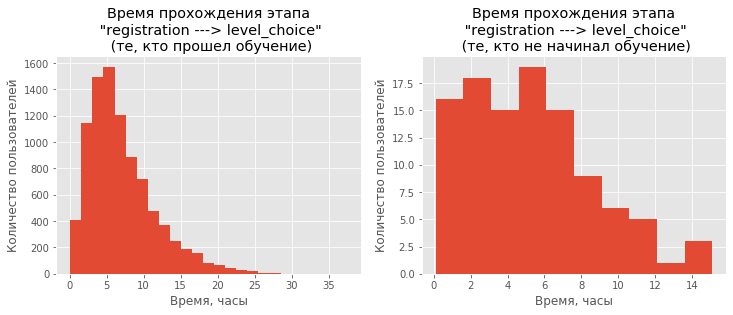

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].hist(registration_level_choice_merged_df_1['timedelta'], bins=25)
axes[0].set_title('Время прохождения этапа\n "registration ---> level_choice"\n (те, кто прошел обучение)')
axes[0].set_ylabel('Количество пользователей')
axes[0].set_xlabel('Время, часы')

axes[1].hist(registration_level_choice_merged_df_2['timedelta'])
axes[1].set_title('Время прохождения этапа\n "registration ---> level_choice"\n (те, кто не начинал обучение)')
axes[1].set_ylabel('Количество пользователей')
axes[1].set_xlabel('Время, часы')

Text(0.5, 0, 'Время, минуты')

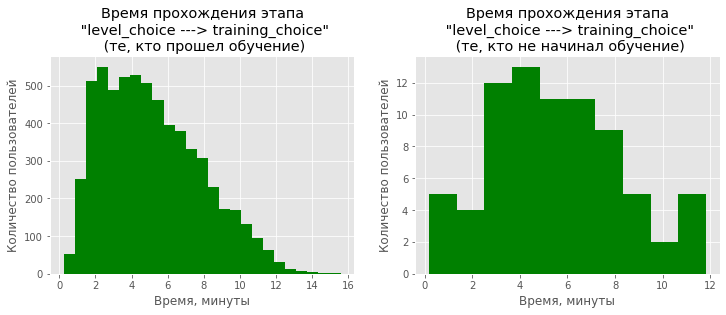

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].hist(level_choice_training_choice_merged_df_1['timedelta'], bins=25, color = 'green')
axes[0].set_title('Время прохождения этапа\n "level_choice ---> training_choice"\n (те, кто прошел обучение)')
axes[0].set_ylabel('Количество пользователей')
axes[0].set_xlabel('Время, минуты')

axes[1].hist(level_choice_training_choice_merged_df_2['timedelta'], color = 'green')
axes[1].set_title('Время прохождения этапа\n "level_choice ---> training_choice"\n (те, кто не начинал обучение)')
axes[1].set_ylabel('Количество пользователей')
axes[1].set_xlabel('Время, минуты')

Text(0.5, 0, 'Время, часы')

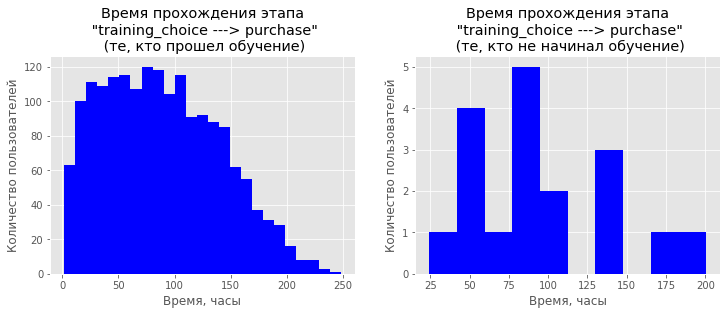

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].hist(training_choice_purchase_merged_df_1['timedelta'], bins=25, color = 'blue')
axes[0].set_title('Время прохождения этапа\n "training_choice ---> purchase"\n (те, кто прошел обучение)')
axes[0].set_ylabel('Количество пользователей')
axes[0].set_xlabel('Время, часы')

axes[1].hist(training_choice_purchase_merged_df_2['timedelta'], color = 'blue')
axes[1].set_title('Время прохождения этапа\n "training_choice ---> purchase"\n (те, кто не начинал обучение)')
axes[1].set_ylabel('Количество пользователей')
axes[1].set_xlabel('Время, часы')

---

<div class="alert alert-block alert-warning">
    

### Комментарий
Получился очень подробный анализ, подкрепленный визуализацией! Отличная работа!

</div>

---

<a id="2"></a>
Приступим к анализу __второй гипотезы__, которая звучит так:
>#### Существует ли зависимость между вероятностью оплаты тренировки и количеством обучений, которые начинал или завершал пользователь? Нужно доказать, что успешное обучение влияет на оплату само по себе, без разницы, какое оно было по порядку.

Давайте попробуем выделить разные группы пользователей:
 - тех, кто начинал обучение (__tutorial_start__) от __1__ до __9__ раз
 - тех, кто заканчивал обучение (__tutorial_finish__) от __1__ до __9__ раз

Выделим пользователей, которые совершали разное количество событий __tutorial_start__ в отдельную переменную __quantity_tutorial_start_per_user_df__.

In [66]:
quantity_tutorial_start_per_user_df = tutorial_start_df['user_id'].value_counts()
quantity_tutorial_start_per_user_df = pd.DataFrame({'user_id':quantity_tutorial_start_per_user_df.index, 'count':quantity_tutorial_start_per_user_df.values})
quantity_tutorial_start_per_user_df

,user_id,count
0,60750,9
1,54866,9
2,65460,9
3,52280,9
4,70648,9
...,...,...
14546,57924,1
14547,55875,1
14548,53826,1
14549,51777,1


In [67]:
len(quantity_tutorial_start_per_user_df)

14551

Выделим пользователей, которые совершали разное количество событий __tutorial_finish__ в отдельную переменную __quantity_tutorial_finish_per_user_df__

In [68]:
quantity_tutorial_finish_per_user_df = tutorial_finish_df['user_id'].value_counts()
quantity_tutorial_finish_per_user_df = pd.DataFrame({'user_id':quantity_tutorial_finish_per_user_df.index, 'count':quantity_tutorial_finish_per_user_df.values})
quantity_tutorial_finish_per_user_df

,user_id,count
0,49684,9
1,68670,9
2,48313,9
3,58532,9
4,68091,9
...,...,...
12526,67561,1
12527,69608,1
12528,63463,1
12529,61412,1


Итого имеем, что:
 - _количество тех кто начинал обучение:_ __14551__
 - _количество тех кто закончил обучение:_ __12531__

Мы можем убедиться, что пользователи соверашли количество событий __tutorial_start__ или __tutorial_finish__ в диапазаоне __от 1 до 9__ раз

In [69]:
quantity_tutorial_finish_per_user_df['count'].unique()

array([9, 8, 7, 6, 5, 4, 3, 2, 1], dtype=int64)

In [70]:
quantity_tutorial_start_per_user_df['count'].unique()

array([9, 8, 7, 6, 5, 4, 3, 2, 1], dtype=int64)

Выделим списки пользователей с разным количеством выполнения __tutorial_start__ или __tutorial_finish__ событий в разные множества. Индексы в конце имени каждого множества будут говорить о количестве того или иного события, которое выполнили пользователи в данном списке.

In [71]:
#Пользователи выполнившие событие tutorial_start 1 раз
tutorial_start_1 = quantity_tutorial_start_per_user_df[quantity_tutorial_start_per_user_df['count']==1]['user_id'].unique()
len(tutorial_start_1)

11055

In [72]:
#Пользователи выполнившие событие tutorial_start 2 раза
tutorial_start_2 = quantity_tutorial_start_per_user_df[quantity_tutorial_start_per_user_df['count']==2]['user_id'].unique()
len(tutorial_start_2)

2018

In [73]:
#Пользователи выполнившие событие tutorial_start 3 раза
tutorial_start_3 = quantity_tutorial_start_per_user_df[quantity_tutorial_start_per_user_df['count']==3]['user_id'].unique()
len(tutorial_start_3)

531

In [74]:
#Пользователи выполнившие событие tutorial_start 4 раза
tutorial_start_4 = quantity_tutorial_start_per_user_df[quantity_tutorial_start_per_user_df['count']==4]['user_id'].unique()
len(tutorial_start_4)

227

In [75]:
#Пользователи выполнившие событие tutorial_start 5 раз
tutorial_start_5 = quantity_tutorial_start_per_user_df[quantity_tutorial_start_per_user_df['count']==5]['user_id'].unique()
len(tutorial_start_5)

163

In [76]:
#Пользователи выполнившие событие tutorial_start 6 раз
tutorial_start_6 = quantity_tutorial_start_per_user_df[quantity_tutorial_start_per_user_df['count']==6]['user_id'].unique()
len(tutorial_start_6)

138

In [77]:
#Пользователи выполнившие событие tutorial_start 7 раз
tutorial_start_7 = quantity_tutorial_start_per_user_df[quantity_tutorial_start_per_user_df['count']==7]['user_id'].unique()
len(tutorial_start_7)

143

In [78]:
#Пользователи выполнившие событие tutorial_start 8 раз
tutorial_start_8 = quantity_tutorial_start_per_user_df[quantity_tutorial_start_per_user_df['count']==8]['user_id'].unique()
len(tutorial_start_8)

123

In [79]:
#Пользователи выполнившие событие tutorial_start 9 раз
tutorial_start_9 = quantity_tutorial_start_per_user_df[quantity_tutorial_start_per_user_df['count']==9]['user_id'].unique()
len(tutorial_start_9)

153

In [80]:
#Пользователи выполнившие событие tutorial_finish 1 раз
tutorial_finish_1 = quantity_tutorial_finish_per_user_df[quantity_tutorial_finish_per_user_df['count']==1]['user_id'].unique()
len(tutorial_finish_1)

9721

In [81]:
#Пользователи выполнившие событие tutorial_finish 2 раза
tutorial_finish_2 = quantity_tutorial_finish_per_user_df[quantity_tutorial_finish_per_user_df['count']==2]['user_id'].unique()
len(tutorial_finish_2)

1599

In [82]:
#Пользователи выполнившие событие tutorial_finish 3 раза
tutorial_finish_3 = quantity_tutorial_finish_per_user_df[quantity_tutorial_finish_per_user_df['count']==3]['user_id'].unique()
len(tutorial_finish_3)

430

In [83]:
#Пользователи выполнившие событие tutorial_finish 4 раза
tutorial_finish_4 = quantity_tutorial_finish_per_user_df[quantity_tutorial_finish_per_user_df['count']==4]['user_id'].unique()
len(tutorial_finish_4)

231

In [84]:
#Пользователи выполнившие событие tutorial_finish 5 раз
tutorial_finish_5 = quantity_tutorial_finish_per_user_df[quantity_tutorial_finish_per_user_df['count']==5]['user_id'].unique()
len(tutorial_finish_5)

166

In [85]:
#Пользователи выполнившие событие tutorial_finish 6 раз
tutorial_finish_6 = quantity_tutorial_finish_per_user_df[quantity_tutorial_finish_per_user_df['count']==6]['user_id'].unique()
len(tutorial_finish_6)

166

In [86]:
#Пользователи выполнившие событие tutorial_finish 7 раз
tutorial_finish_7 = quantity_tutorial_finish_per_user_df[quantity_tutorial_finish_per_user_df['count']==7]['user_id'].unique()
len(tutorial_finish_7)

126

In [87]:
#Пользователи выполнившие событие tutorial_finish 8 раз
tutorial_finish_8 = quantity_tutorial_finish_per_user_df[quantity_tutorial_finish_per_user_df['count']==8]['user_id'].unique()
len(tutorial_finish_8)

65

In [88]:
#Пользователи выполнившие событие tutorial_finish 9 раз
tutorial_finish_9 = quantity_tutorial_finish_per_user_df[quantity_tutorial_finish_per_user_df['count']==9]['user_id'].unique()
len(tutorial_finish_9)

27

Проверим, правильно ли мы поделили пользолателей по группам, для этого просуммируем количество в каждой группе и сравним с общим количеством пользователей, которые выполнили соответствующие этапы.

In [89]:
len(quantity_tutorial_start_per_user_df) == len(tutorial_start_1) + len(tutorial_start_2) + len(tutorial_start_3) + len(tutorial_start_4) + len(tutorial_start_5) + len(tutorial_start_6) + len(tutorial_start_7) + len(tutorial_start_8) + len(tutorial_start_9)

True

In [90]:
len(quantity_tutorial_finish_per_user_df) == len(tutorial_finish_1) + len(tutorial_finish_2) + len(tutorial_finish_3) + len(tutorial_finish_4) + len(tutorial_finish_5) + len(tutorial_finish_6) + len(tutorial_finish_7) + len(tutorial_finish_8) + len(tutorial_finish_9)

True

Давайте для каждого списка пользователей с разным количеством выполнения __tutorial_start__ или __tutorial_finish__ событий выделим тех пользователей, которые совершили покупку тренировок (вместе с суммой). Индексы в конце имени каждого множества будут по-прежнему говорить о количестве того или иного события, которые выполнили пользователи в данном списке.

In [91]:
#Пользователи, которые купили платные тренировки и выполнившие событие tutorial_start 1 раз
purchase_tutorial_start_1 = purchase_df[purchase_df['user_id'].isin(tutorial_start_1)][['user_id','amount']]
purchase_tutorial_start_1.head()

,user_id,amount
2,61351,100
3,48037,50
4,67987,100
7,61608,50
8,63035,100


In [92]:
#Пользователи, которые купили платные тренировки и выполнившие событие tutorial_start 2 раза
purchase_tutorial_start_2 = purchase_df[purchase_df['user_id'].isin(tutorial_start_2)][['user_id','amount']]
purchase_tutorial_start_2.head()

,user_id,amount
9,57360,50
14,47887,150
15,61419,50
21,69621,150
23,71715,150


In [93]:
#Пользователи, которые купили платные тренировки и выполнившие событие tutorial_start 3 раза
purchase_tutorial_start_3 = purchase_df[purchase_df['user_id'].isin(tutorial_start_3)][['user_id','amount']]
purchase_tutorial_start_3.head()

,user_id,amount
1,58528,100
19,71030,100
40,68783,300
124,66179,100
131,62866,50


In [94]:
#Пользователи, которые купили платные тренировки и выполнившие событие tutorial_start 4 раза
purchase_tutorial_start_4 = purchase_df[purchase_df['user_id'].isin(tutorial_start_4)][['user_id','amount']]
purchase_tutorial_start_4.head()

,user_id,amount
6,65863,25
25,62536,150
84,63669,150
105,54831,150
205,65575,100


In [95]:
#Пользователи, которые купили платные тренировки и выполнившие событие tutorial_start 5 раз
purchase_tutorial_start_5 = purchase_df[purchase_df['user_id'].isin(tutorial_start_5)][['user_id','amount']]
purchase_tutorial_start_5.head()

,user_id,amount
0,67986,50
111,48001,100
210,70359,100
359,64229,100
468,50593,50


In [96]:
#Пользователи, которые купили платные тренировки и выполнившие событие tutorial_start 6 раз
purchase_tutorial_start_6 = purchase_df[purchase_df['user_id'].isin(tutorial_start_6)][['user_id','amount']]
purchase_tutorial_start_6.head()

,user_id,amount
85,70331,50
204,64868,50
367,49255,50
424,66163,150
453,52492,150


In [97]:
#Пользователи, которые купили платные тренировки и выполнившие событие tutorial_start 7 раз
purchase_tutorial_start_7 = purchase_df[purchase_df['user_id'].isin(tutorial_start_7)][['user_id','amount']]
purchase_tutorial_start_7.head()

,user_id,amount
79,50553,150
184,64209,100
189,60044,50
201,49857,100
263,63627,100


In [98]:
#Пользователи, которые купили платные тренировки и выполнившие событие tutorial_start 8 раз
purchase_tutorial_start_8 = purchase_df[purchase_df['user_id'].isin(tutorial_start_8)][['user_id','amount']]
purchase_tutorial_start_8.head()

,user_id,amount
5,51206,100
139,64973,100
144,54550,150
624,52883,50
626,57305,50


In [99]:
#Пользователи, которые купили платные тренировки и выполнившие событие tutorial_start 9 раз
purchase_tutorial_start_9 = purchase_df[purchase_df['user_id'].isin(tutorial_start_9)][['user_id','amount']]
purchase_tutorial_start_9.head()

,user_id,amount
106,51611,50
178,63362,100
260,63176,250
352,52280,50
396,56838,50


In [100]:
#Пользователи, которые купили платные тренировки и выполнившие событие tutorial_finish 1 раз
purchase_tutorial_finish_1 = purchase_df[purchase_df['user_id'].isin(tutorial_finish_1)][['user_id','amount']]
purchase_tutorial_finish_1.head()

,user_id,amount
2,61351,100
3,48037,50
4,67987,100
7,61608,50
8,63035,100


In [101]:
#Пользователи, которые купили платные тренировки и выполнившие событие tutorial_finish 2 раза
purchase_tutorial_finish_2 = purchase_df[purchase_df['user_id'].isin(tutorial_finish_2)][['user_id','amount']]
purchase_tutorial_finish_2.head()

,user_id,amount
1,58528,100
6,65863,25
9,57360,50
19,71030,100
23,71715,150


In [102]:
#Пользователи, которые купили платные тренировки и выполнившие событие tutorial_finish 3 раза
purchase_tutorial_finish_3 = purchase_df[purchase_df['user_id'].isin(tutorial_finish_3)][['user_id','amount']]
purchase_tutorial_finish_3.head()

,user_id,amount
84,63669,150
105,54831,150
124,66179,100
131,62866,50
133,62757,100


In [103]:
#Пользователи, которые купили платные тренировки и выполнившие событие tutorial_finish 4 раза
purchase_tutorial_finish_4 = purchase_df[purchase_df['user_id'].isin(tutorial_finish_4)][['user_id','amount']]
purchase_tutorial_finish_4.head()

,user_id,amount
0,67986,50
25,62536,150
79,50553,150
85,70331,50
111,48001,100


In [104]:
#Пользователи, которые купили платные тренировки и выполнившие событие tutorial_finish 5 раз
purchase_tutorial_finish_5 = purchase_df[purchase_df['user_id'].isin(tutorial_finish_5)][['user_id','amount']]
purchase_tutorial_finish_5.head()

,user_id,amount
184,64209,100
189,60044,50
210,70359,100
263,63627,100
424,66163,150


In [105]:
#Пользователи, которые купили платные тренировки и выполнившие событие tutorial_finish 6 раз
purchase_tutorial_finish_6 = purchase_df[purchase_df['user_id'].isin(tutorial_finish_6)][['user_id','amount']]
purchase_tutorial_finish_6.head()

,user_id,amount
5,51206,100
106,51611,50
139,64973,100
204,64868,50
311,52796,50


In [106]:
#Пользователи, которые купили платные тренировки и выполнившие событие tutorial_finish 7 раз
purchase_tutorial_finish_7 = purchase_df[purchase_df['user_id'].isin(tutorial_finish_7)][['user_id','amount']]
purchase_tutorial_finish_7.head()

,user_id,amount
144,54550,150
396,56838,50
428,55698,50
787,67285,150
892,58578,100


In [107]:
#Пользователи, которые купили платные тренировки и выполнившие событие tutorial_finish 8 раз
purchase_tutorial_finish_8 = purchase_df[purchase_df['user_id'].isin(tutorial_finish_8)][['user_id','amount']]
purchase_tutorial_finish_8.head()

,user_id,amount
178,63362,100
260,63176,250
596,48146,100
1272,59268,200
1317,70297,50


In [108]:
#Пользователи, которые купили платные тренировки и выполнившие событие tutorial_finish 9 раз
purchase_tutorial_finish_9 = purchase_df[purchase_df['user_id'].isin(tutorial_finish_9)][['user_id','amount']]
purchase_tutorial_finish_9.head()

,user_id,amount
619,62844,100
1096,67994,50
1253,49726,100
1584,51717,50
1944,57184,50


Давайте расчитаем проценты пользователей, которые совершают оплаты, в зависимости от количества событий __tutorial_start__ и __tutorial_finish__, которые они совершают:

In [109]:
rate_tutorial_start_1 = purchase_tutorial_start_1['user_id'].nunique() / len(tutorial_start_1)
rate_tutorial_start_2 = purchase_tutorial_start_2['user_id'].nunique() / len(tutorial_start_2)
rate_tutorial_start_3 = purchase_tutorial_start_3['user_id'].nunique() / len(tutorial_start_3)
rate_tutorial_start_4 = purchase_tutorial_start_4['user_id'].nunique() / len(tutorial_start_4)
rate_tutorial_start_5 = purchase_tutorial_start_5['user_id'].nunique() / len(tutorial_start_5)
rate_tutorial_start_6 = purchase_tutorial_start_6['user_id'].nunique() / len(tutorial_start_6)
rate_tutorial_start_7 = purchase_tutorial_start_7['user_id'].nunique() / len(tutorial_start_7)
rate_tutorial_start_8 = purchase_tutorial_start_8['user_id'].nunique() / len(tutorial_start_8)
rate_tutorial_start_9 = purchase_tutorial_start_9['user_id'].nunique() / len(tutorial_start_9)
print ('Процент пользователей, которые совершили оплату из тех, кто:\n')
print(' - начинал обучение 1 раз: {:.2%}'.format(rate_tutorial_start_1))
print(' - начинал обучение 2 раза: {:.2%}'.format(rate_tutorial_start_2))
print(' - начинал обучение 3 раза: {:.2%}'.format(rate_tutorial_start_3))
print(' - начинал обучение 4 раза: {:.2%}'.format(rate_tutorial_start_4))
print(' - начинал обучение 5 раз: {:.2%}'.format(rate_tutorial_start_5))
print(' - начинал обучение 6 раз: {:.2%}'.format(rate_tutorial_start_6))
print(' - начинал обучение 7 раз: {:.2%}'.format(rate_tutorial_start_7))
print(' - начинал обучение 8 раз: {:.2%}'.format(rate_tutorial_start_8))
print(' - начинал обучение 9 раз: {:.2%}'.format(rate_tutorial_start_9))

Процент пользователей, которые совершили оплату из тех, кто:

 - начинал обучение 1 раз: 13.24%
 - начинал обучение 2 раза: 13.43%
 - начинал обучение 3 раза: 15.44%
 - начинал обучение 4 раза: 15.42%
 - начинал обучение 5 раз: 15.34%
 - начинал обучение 6 раз: 10.87%
 - начинал обучение 7 раз: 16.08%
 - начинал обучение 8 раз: 15.45%
 - начинал обучение 9 раз: 14.38%


In [110]:
rate_tutorial_finish_1 = purchase_tutorial_finish_1['user_id'].nunique() / len(tutorial_finish_1)
rate_tutorial_finish_2 = purchase_tutorial_finish_2['user_id'].nunique() / len(tutorial_finish_2)
rate_tutorial_finish_3 = purchase_tutorial_finish_3['user_id'].nunique() / len(tutorial_finish_3)
rate_tutorial_finish_4 = purchase_tutorial_finish_4['user_id'].nunique() / len(tutorial_finish_4)
rate_tutorial_finish_5 = purchase_tutorial_finish_5['user_id'].nunique() / len(tutorial_finish_5)
rate_tutorial_finish_6 = purchase_tutorial_finish_6['user_id'].nunique() / len(tutorial_finish_6)
rate_tutorial_finish_7 = purchase_tutorial_finish_7['user_id'].nunique() / len(tutorial_finish_7)
rate_tutorial_finish_8 = purchase_tutorial_finish_8['user_id'].nunique() / len(tutorial_finish_8)
rate_tutorial_finish_9 = purchase_tutorial_finish_9['user_id'].nunique() / len(tutorial_finish_9)
print ('Процент пользователей, которые совершили оплату из тех, кто:\n')
print(' - завершил обучение 1 раз: {:.2%}'.format(rate_tutorial_finish_1))
print(' - завершил обучение 2 раза: {:.2%}'.format(rate_tutorial_finish_2))
print(' - завершил обучение 3 раза: {:.2%}'.format(rate_tutorial_finish_3))
print(' - завершил обучение 4 раза: {:.2%}'.format(rate_tutorial_finish_4))
print(' - завершил обучение 5 раз: {:.2%}'.format(rate_tutorial_finish_5))
print(' - завершил обучение 6 раз: {:.2%}'.format(rate_tutorial_finish_6))
print(' - завершил обучение 7 раз: {:.2%}'.format(rate_tutorial_finish_7))
print(' - завершил обучение 8 раз: {:.2%}'.format(rate_tutorial_finish_8))
print(' - завершил обучение 9 раз: {:.2%}'.format(rate_tutorial_finish_9))

Процент пользователей, которые совершили оплату из тех, кто:

 - завершил обучение 1 раз: 14.05%
 - завершил обучение 2 раза: 14.70%
 - завершил обучение 3 раза: 15.81%
 - завершил обучение 4 раза: 14.72%
 - завершил обучение 5 раз: 13.25%
 - завершил обучение 6 раз: 15.06%
 - завершил обучение 7 раз: 12.70%
 - завершил обучение 8 раз: 15.38%
 - завершил обучение 9 раз: 18.52%


Нам стоит вспомнить наше __общее количество пользователей, который совершили оплату__:

In [111]:
len(purchase_users)

1974

Количество пользователей, которые __не начинали обучение, но купили платные тренировки__:

In [112]:
len(purchase_stage_users_without_tutorial_start['user_id'])

18

Количество пользователей, которые __закончили обучение и купили платные тренировки__:

In [113]:
len(purchase_stage_users_w_tutorial_finish['user_id'])

1781

Количество пользователей, которые __начали обучение, не закончили его, но купили платные тренировки__:

In [114]:
len(purchase_users) - len(purchase_stage_users_w_tutorial_finish['user_id']) - len(purchase_stage_users_without_tutorial_start['user_id'])

175

In [115]:
rate_purchase = len(purchase_stage_users_w_tutorial_finish['user_id']) / len(purchase_users)
print ('Процент пользователей, которые совершили оплату из тех, кто завершил обучение любое количество раз: {:.2%}'.format(rate_purchase))

Процент пользователей, которые совершили оплату из тех, кто завершил обучение любое количество раз: 90.22%


В качестве дополнительного анализа исследуем зависит ли размер оплаты (__amount__) от количества завершенных обучений (__tutorial_finish__).

In [116]:
print('Сумма приобретения платных тренировок теми, кто:\n\n')
print(' - завершил обучение 1 раз:', purchase_tutorial_finish_1['amount'].sum(), 'руб.')
print(' - завершил обучение 2 раза:', purchase_tutorial_finish_2['amount'].sum(), 'руб.')
print(' - завершил обучение 3 раза:', purchase_tutorial_finish_3['amount'].sum(), 'руб.')
print(' - завершил обучение 4 раза:', purchase_tutorial_finish_4['amount'].sum(), 'руб.')
print(' - завершил обучение 5 раз:', purchase_tutorial_finish_5['amount'].sum(), 'руб.')
print(' - завершил обучение 6 раз:', purchase_tutorial_finish_6['amount'].sum(), 'руб.')
print(' - завершил обучение 7 раз:', purchase_tutorial_finish_7['amount'].sum(), 'руб.')
print(' - завершил обучение 8 раз:', purchase_tutorial_finish_8['amount'].sum(), 'руб.')
print(' - завершил обучение 9 раз:', purchase_tutorial_finish_9['amount'].sum(), 'руб.')
print()
purchase_tutorial_finish_sum = purchase_tutorial_finish_1['amount'].sum()+purchase_tutorial_finish_2['amount'].sum()+purchase_tutorial_finish_3['amount'].sum()+purchase_tutorial_finish_4['amount'].sum()+purchase_tutorial_finish_5['amount'].sum()+purchase_tutorial_finish_6['amount'].sum()+purchase_tutorial_finish_7['amount'].sum()+purchase_tutorial_finish_8['amount'].sum()+purchase_tutorial_finish_9['amount'].sum()
print('Всего:', purchase_tutorial_finish_sum, 'руб.')

Сумма приобретения платных тренировок теми, кто:


 - завершил обучение 1 раз: 148875 руб.
 - завершил обучение 2 раза: 25350 руб.
 - завершил обучение 3 раза: 7275 руб.
 - завершил обучение 4 раза: 3450 руб.
 - завершил обучение 5 раз: 2525 руб.
 - завершил обучение 6 раз: 2200 руб.
 - завершил обучение 7 раз: 1200 руб.
 - завершил обучение 8 раз: 1250 руб.
 - завершил обучение 9 раз: 350 руб.

Всего: 192475 руб.


In [117]:
purchase_tutorial_finish_1_percent = purchase_tutorial_finish_1['amount'].sum()/purchase_tutorial_finish_sum
purchase_tutorial_finish_2_percent = purchase_tutorial_finish_2['amount'].sum()/purchase_tutorial_finish_sum
purchase_tutorial_finish_3_percent = purchase_tutorial_finish_3['amount'].sum()/purchase_tutorial_finish_sum
purchase_tutorial_finish_4_percent = purchase_tutorial_finish_4['amount'].sum()/purchase_tutorial_finish_sum
purchase_tutorial_finish_5_percent = purchase_tutorial_finish_5['amount'].sum()/purchase_tutorial_finish_sum
purchase_tutorial_finish_6_percent = purchase_tutorial_finish_6['amount'].sum()/purchase_tutorial_finish_sum
purchase_tutorial_finish_7_percent = purchase_tutorial_finish_7['amount'].sum()/purchase_tutorial_finish_sum
purchase_tutorial_finish_8_percent = purchase_tutorial_finish_8['amount'].sum()/purchase_tutorial_finish_sum
purchase_tutorial_finish_9_percent = purchase_tutorial_finish_9['amount'].sum()/purchase_tutorial_finish_sum

print('Процент приобретения платных тренировок теми, кто:\n\n')
print(' - завершил обучение 1 раз: {:.2%}'.format(purchase_tutorial_finish_1_percent))
print(' - завершил обучение 2 раза: {:.2%}'.format(purchase_tutorial_finish_2_percent))
print(' - завершил обучение 3 раза: {:.2%}'.format(purchase_tutorial_finish_3_percent))
print(' - завершил обучение 4 раза: {:.2%}'.format(purchase_tutorial_finish_4_percent))
print(' - завершил обучение 5 раз: {:.2%}'.format(purchase_tutorial_finish_5_percent))
print(' - завершил обучение 6 раз: {:.2%}'.format(purchase_tutorial_finish_6_percent))
print(' - завершил обучение 7 раз: {:.2%}'.format(purchase_tutorial_finish_7_percent))
print(' - завершил обучение 8 раз: {:.2%}'.format(purchase_tutorial_finish_8_percent))
print(' - завершил обучение 9 раз: {:.2%}'.format(purchase_tutorial_finish_9_percent))

Процент приобретения платных тренировок теми, кто:


 - завершил обучение 1 раз: 77.35%
 - завершил обучение 2 раза: 13.17%
 - завершил обучение 3 раза: 3.78%
 - завершил обучение 4 раза: 1.79%
 - завершил обучение 5 раз: 1.31%
 - завершил обучение 6 раз: 1.14%
 - завершил обучение 7 раз: 0.62%
 - завершил обучение 8 раз: 0.65%
 - завершил обучение 9 раз: 0.18%


In [118]:
print('Процент дохода, которые приносят пользователи, завершившие обучение больше 2 раз в сравнении с доходом, который приносят пользователи закончившие обучение 1 раз: {:.2%}'.format((purchase_tutorial_finish_2['amount'].sum() + purchase_tutorial_finish_3['amount'].sum() + purchase_tutorial_finish_4['amount'].sum() + purchase_tutorial_finish_5['amount'].sum() + purchase_tutorial_finish_6['amount'].sum() + purchase_tutorial_finish_7['amount'].sum() + purchase_tutorial_finish_8['amount'].sum() + purchase_tutorial_finish_9['amount'].sum())/purchase_tutorial_finish_1['amount'].sum()))

Процент дохода, которые приносят пользователи, завершившие обучение больше 2 раз в сравнении с доходом, который приносят пользователи закончившие обучение 1 раз: 29.29%


Для лучшей наглядности построим __круговую диаграмму__

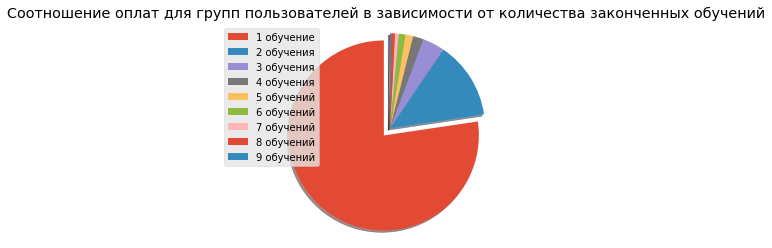

In [119]:
labels = '1 обучение', '2 обучения', '3 обучения', '4 обучения', '5 обучений', '6 обучений', '7 обучений', '8 обучений', '9 обучений'

sizes = [purchase_tutorial_finish_1_percent, purchase_tutorial_finish_2_percent, purchase_tutorial_finish_3_percent, purchase_tutorial_finish_4_percent, purchase_tutorial_finish_5_percent, purchase_tutorial_finish_6_percent, purchase_tutorial_finish_7_percent, purchase_tutorial_finish_8_percent, purchase_tutorial_finish_9_percent]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0) 

patches, texts = plt.pie(sizes, explode=explode, shadow=True, startangle=90)
plt.title('Соотношение оплат для групп пользователей в зависимости от количества законченных обучений')
plt.legend(patches, labels, loc="best")
plt.axis('equal')
# plt.tight_layout()
plt.show()

---

<div class="alert alert-block alert-warning">
    

### Комментарий
Стоит отметить, что вы создали большое количество похожих датафреймов, что очень затрудняет чтение кода и поиск возможной ошибки (а также увеличивает вероятность ее совершить!). Пожалуй, стоит задуматься об оптимизации кода.
В остальном анализ очень подробный, спасибо!

</div>

---

<a id="Детали2"></a>
### О чём это всё говорит?

#### 1. Успешное (завершенное) обучение влияет на оплату само по себе (вне зависимсти от их количества) и составляет 90.22% от общего количества оплат.

#### 2. Проверив соотношение оплат в зависимости от количества завершенных обучений пользователем мы можем прийти к выводу, что вероятность покупки не увеличивается от того, что человек больше обучался. Процент оплат для разного количества обучений (в наших расчетах их 9) лежит в диапазоне от 12.7% до 18.52% что в среднем составляет 14.91%

#### 3. Сумма оплат не зависит от количества законченнных обучений. Более того, пользователи, которые заканчивают обучение 1 раз совершают больше всего покупок. К тому же сумма дохода, которые приносят пользователи прошедшие обучение 2 и более раз составляет лишь 29.29% от суммы дохода, которые приносят пользователи прошедшие обучение 1 раз.

___

<a id="3"></a>
Мы подошли к анализу __третьей гипотезы__. Напомним в чем она заключается.<br><br>
> **Как часто пользователи начинают обучение после того, как они выбрали уровень сложности тренировок? Это позволит нам понять, насколько процесс работы с приложением понятен для пользователей: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна**
___

Для каждого пользователя создадим список, который будет содержать во временной последовательности все события, которые совершал этот пользователь, чтобы в последствии выделить события, когда пользователь после выбора уровня сложности (__level_choice__) возвращается к старту обучения (__tutorial_start__).      

Для этого воспользуемся методом __groupby__ по столбцу __event_type__ в __total_events_df__ датафрейме и применим аргегирующую функцию __apply(list)__. Таким образом, мы сгруппируем строки по пользователю, а затем объединим в списки содержимое столбца __event_type__ по каждому пользователю. Запишем результат в датафрейм __user_path_df__.

In [120]:
user_path_df = total_events_df.groupby(['user_id'])['event_type'].apply(list).reset_index()
user_path_df.head(10)

,user_id,event_type
0,47758,"[registration, tutorial_start]"
1,47759,"[registration, tutorial_start, tutorial_finish..."
2,47760,"[registration, tutorial_start, tutorial_finish..."
3,47761,"[registration, tutorial_start, tutorial_finish..."
4,47762,[registration]
5,47763,[registration]
6,47764,[registration]
7,47765,"[registration, tutorial_start]"
8,47766,"[registration, tutorial_start, tutorial_finish..."
9,47767,[registration]


Прежде чем мы сможем оценить популярные пути пользователей, преобразуем список событий в строку __event_path__. Эта операция нужна для оптимизации скорости объединения, так как иначе __pandas__ может делать подсчет слишком долго.

In [121]:
user_path_df['event_path'] = user_path_df['event_type'].apply(lambda x: ' > '.join(x))
user_path_df.head()

,user_id,event_type,event_path
0,47758,"[registration, tutorial_start]",registration > tutorial_start
1,47759,"[registration, tutorial_start, tutorial_finish...",registration > tutorial_start > tutorial_finis...
2,47760,"[registration, tutorial_start, tutorial_finish...",registration > tutorial_start > tutorial_finis...
3,47761,"[registration, tutorial_start, tutorial_finish...",registration > tutorial_start > tutorial_finis...
4,47762,[registration],registration


In [122]:
user_path_df['user_id'].nunique()

24460

Теперь можно сгруппировать датафрейм по столбцу __event_path__, подсчитав число пользователей.

In [123]:
user_paths = user_path_df.groupby(['event_path'])['user_id'].nunique().sort_values(ascending=False)
user_paths

event_path
registration                                                                                                                                                                                                                                                                          9802
registration > tutorial_start > tutorial_finish > level_choice > training_choice                                                                                                                                                                                                      3248
registration > tutorial_start > tutorial_finish                                                                                                                                                                                                                                       2425
registration > tutorial_start > tutorial_finish > level_choice                                                                              

Выделим те пути, которые содержат __level_choice > tutorial_start__, это позволит нам понять количество пользователей, которые _возвращаются к обучению после вібора уровня сложности_.

In [124]:
user_paths[user_paths.index.str.contains('level_choice > tutorial_start')]

event_path
registration > tutorial_start > tutorial_finish > level_choice > tutorial_start > tutorial_finish                                                                                                                                                                                                                                       233
registration > tutorial_start > tutorial_finish > level_choice > tutorial_start                                                                                                                                                                                                                                                          44
registration > tutorial_start > tutorial_finish > level_choice > tutorial_start > tutorial_finish > tutorial_start > tutorial_finish                                                                                                                                                                                                 

In [125]:
level_choice_to_tutorial_start_count = user_paths[user_paths.index.str.contains('level_choice > tutorial_start')]
len(level_choice_to_tutorial_start_count)

190

In [126]:
len(user_paths)

752

In [127]:
user_paths.sum()

24460

Мы видим, у нас имеется __752 уникальных путей__, которые пользователи проходят в работе с приложением, из них __190 путей__ пользователей содержат в себе информацию о _возврате к обучению после выбора уровня сложности_. Это нам пока говорит о малом, ведь нас интересует процент пользователей (от общего числа зарегистрированных: __24460__), которые возвращаются.

In [128]:
user_count_return_to_tutorial_start = level_choice_to_tutorial_start_count.sum()
print('Количество пользователей, которые возвращаются к этапу обучения после выбора уровня сложности:', user_count_return_to_tutorial_start)
print ('Их процент от общего числа зарегистрированных: {:.2%}'.format(user_count_return_to_tutorial_start/user_paths.sum()))

Количество пользователей, которые возвращаются к этапу обучения после выбора уровня сложности: 601
Их процент от общего числа зарегистрированных: 2.46%


Как мы видим, всего лишь __2.46%__ пользователей возвращаются к обучению после выбора уровня сложности тренировки. На основании этого можно сделать вывод:
 - процесс работы с приложением понятен для большинтва пользователей.
 
_Если бы этот процент бы большой (допустим 25% и более), то мы могли бы уже допустить, что процесс тренировок устроен не понятно, и возможно стоит улучшить User Interface, чтобы он был более понятен пользователю или даже сделать обучение обязательным этапом для всех._

---

<div class="alert alert-block alert-warning">
    

### Комментарий
Здорово, что удалось добраться до дополнительного задания!

</div>

---

## Итоги анализа по трём гипотезам:

#### 1. Среднее время прохождение этапов "level_choice ---> training_choice" и "training_choice ---> purchase" отличается для тех, кто прошли обучение, оно меньше в сравнении с теми, кто обучение не проходил. Те, кто проходит обучение в итоге проходят этап "level_choice ---> training_choice" на 23 секунды быстрее, а этап "training_choice ---> purchase"  на 6 часов 8 минут и 9 секунд быстрее.  [Детали](#Детали1)



#### 2. Успешное (завершенное) обучение влияет на оплату само по себе. Вероятность покупки не увеличивается от того, что человек больше обучался. Сумма оплат не зависит от большего количества законченнных обучений. [Детали](#Детали2)

#### 3. Процесс работы с приложением понятен для большинтва пользователей поскольку лишь __2.46%__ пользователей возвращаются к обучению после выбора уровня сложности тренировки.

---

<div class="alert alert-block alert-warning">
    

### Комментарий
Спасибо за отлично проделанную работу!
Здорово, что в конце тетрадки еще раз приведены полученные выводы. Было бы также интересно дать конкретные рекомендации руководству компании. Хочется отметить хорошую структурированность исследования, отличные навыки визуализации, вдумчивость и внимательность при выполнении проекта.

Удачи в дальнейшем обучении!

</div>

---